Since Data cleaning was already conducted, all we will do is import clean data set and run model for KNN.

KNN(K=5)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ANA 680/Week 1/data4_ANA_680.csv") 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            569 non-null    int64  
 1   radius_mean           569 non-null    float64
 2   perimeter_mean        569 non-null    float64
 3   area_mean             569 non-null    float64
 4   compactness_mean      569 non-null    float64
 5   concavity_mean        569 non-null    float64
 6   concave points_mean   569 non-null    float64
 7   radius_se             569 non-null    float64
 8   perimeter_se          569 non-null    float64
 9   area_se               569 non-null    float64
 10  radius_worst          569 non-null    float64
 11  perimeter_worst       569 non-null    float64
 12  area_worst            569 non-null    float64
 13  compactness_worst     569 non-null    float64
 14  concavity_worst       569 non-null    float64
 15  concave points_worst  5

In [4]:
y = df['diagnosis']
y.shape

(569,)

In [5]:
#x = df.select_dtypes(exclude=['int64'])
x = pd.DataFrame(df[['radius_mean', 'perimeter_mean','area_mean', 'compactness_mean']])
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   radius_mean       569 non-null    float64
 1   perimeter_mean    569 non-null    float64
 2   area_mean         569 non-null    float64
 3   compactness_mean  569 non-null    float64
dtypes: float64(4)
memory usage: 17.9 KB


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=7)

In [7]:
from sklearn.neighbors import KNeighborsClassifier  
model= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 ) # p is a value used in the distance formula  
model.fit(x_train, y_train.ravel())

KNeighborsClassifier()

In [8]:
y_pred = model.predict(x_test)
result= pd.DataFrame({"y_test": y_test, "Y-pred": y_pred})
result.head(10)

,y_test,Y-pred
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,1,1
6,0,0
7,0,0
8,1,0
9,0,0


In [9]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[91  7]
 [10 35]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91        98
           1       0.83      0.78      0.80        45

    accuracy                           0.88       143
   macro avg       0.87      0.85      0.86       143
weighted avg       0.88      0.88      0.88       143



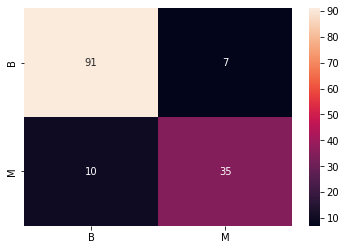

In [10]:
#Using seaborn heatmap to display the confusion matrix
x_axis_labels = ['B', 'M']
y_axis_labels = x_axis_labels
sns.heatmap(cm, annot=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels)

In [11]:
import pickle
# Open a file and use dump() 
with open('KNN.pkl', 'wb') as file: 
      
    # A new file will be created 
    pickle.dump(model, file)